In [ ]:
# Display column names and first few rows to diagnose the error
print("Available columns:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data_path="D:\OLAEM stock\OLAE Historical Data.csv"
df=pd.read_csv(data_path)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02-01-2026,40.48,37.89,40.74,37.80,199.21M,7.89%
1,01-01-2026,37.52,36.30,38.16,36.04,85.39M,3.53%
2,31-12-2025,36.24,36.80,37.50,35.91,48.24M,-0.93%
3,30-12-2025,36.58,35.60,36.80,35.33,48.54M,3.25%
4,29-12-2025,35.43,36.37,36.43,34.85,37.84M,-2.10%


In [13]:
missing_values=df.isnull().sum()
statistics=df.describe()
missing_values, statistics

(Date        0
 Price       0
 Open        0
 High        0
 Low         0
 Vol.        0
 Change %    0
 dtype: int64,
             Price        Open        High         Low
 count  312.000000  312.000000  312.000000  312.000000
 mean    58.298590   58.574904   59.974167   57.103462
 std     17.358625   17.518843   17.966320   16.963926
 min     31.260000   32.010000   33.440000   30.760000
 25%     44.700000   45.387500   46.412500   43.570000
 50%     52.850000   52.890000   54.330000   51.865000
 75%     70.372500   71.010000   72.990000   69.550000
 max     99.260000  100.000000  102.500000   99.000000)

In [11]:
# First, let's check the current column names and data
display("Column names:", df.columns.tolist())
display("First few rows:", df.head())

# Now let's fix the column names by stripping whitespace
df.columns = df.columns.str.strip()
display("\nAfter stripping whitespace from column names:", df.columns.tolist())

# Now the rest of your code should work
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
df.set_index('Date', inplace=True)

# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot the Open price over time
df['Open'].plot(ax=ax[0], color='blue')
ax[0].set_title('Open Price Over Time')
ax[0].set_ylabel('Price ($)')

# Plot the trading volume over time
# Clean the 'Vol.' column (remove 'M' and convert to float)
df['Volume'] = df['Vol.'].str.replace('M', '').astype(float)
df['Volume'].plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume (Millions)')

# Improve layout
plt.tight_layout()
plt.show()

'Column names:'

['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

'First few rows:'

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2026-01-02,40.48,37.89,40.74,37.80,199.21M,7.89%
2026-01-01,37.52,36.30,38.16,36.04,85.39M,3.53%
2025-12-31,36.24,36.80,37.50,35.91,48.24M,-0.93%
2025-12-30,36.58,35.60,36.80,35.33,48.54M,3.25%
2025-12-29,35.43,36.37,36.43,34.85,37.84M,-2.10%


'\nAfter stripping whitespace from column names:'

['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

KeyError: 'Date'

C:\Users\ganes\AppData\Local\Temp\ipykernel_3700\1327341582.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


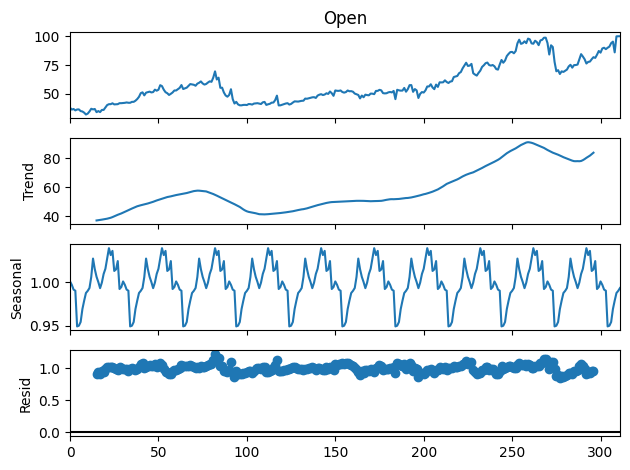

In [8]:
#Seasonality analysis 
decomposition=seasonal_decompose(df['Open'],model='multiplicative',period=30 )
fig=decomposition.plot()
fig.show()

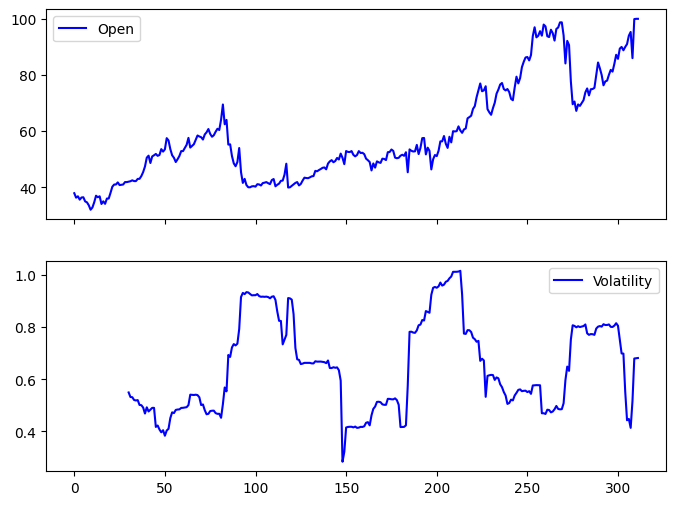

In [9]:
# volatility analysis
df['returns'] = df['Open'].pct_change()
df['Volatility'] = df['returns'].rolling(window=30).std()*np.sqrt(252)
df[['Open','Volatility']].plot(subplots=True,color='blue',figsize=(8,6))
plt.show()


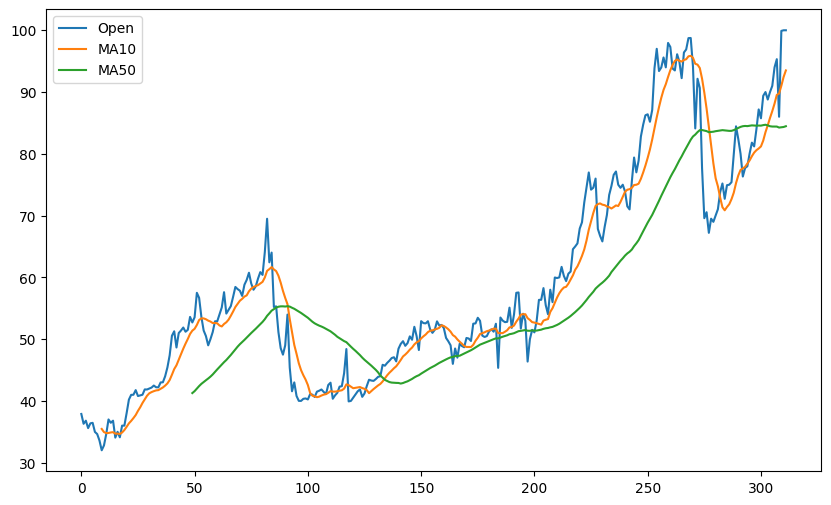

In [10]:
# moving average analysis 
df['MA10'] = df['Open'].rolling(window=10).mean()
df['MA50'] = df['Open'].rolling(window=50).mean()
df[['Open', 'MA10', 'MA50']].plot(label='OLa',figsize=(10,6))
plt.show()

In [17]:
#data for prophet
df_prophet = df.reset_index()[['Date', 'Open']]
df_prophet.rename(columns={'Date': 'ds', 'Open': 'y'}, inplace=True)
df_prophet.head()


,ds,y
0,02-01-2026,37.89
1,01-01-2026,36.30
2,31-12-2025,36.80
3,30-12-2025,35.60
4,29-12-2025,36.37


In [21]:
# Prophet requires columns: ds (date) and y (value)
model = Prophet(daily_seasonality=True)


In [22]:
# Fit model
model.fit(df_prophet)

# Create future dataframe (365 days forecast)
future = model.make_future_dataframe(periods=365)

# Predict
forecast = model.predict(future)


ValueError: time data "31-12-2025" doesn't match format "%m-%d-%Y", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [23]:

# Plot forecast
model.plot(forecast)
plt.show()


NameError: name 'forecast' is not defined